**Contents**: graphs, correlations, chi-square tests and more functions for data cleaning.

**Graphs used in the previous lab:**<br> 
(Some of the definitions refered from the CS105 lectures notes by Professor Strzheletska)<br> 

Histogram: Frequency distribution of a variable.<br>
Bar graph: Any numeric value of a categorical or loosely-ordered variable.<br>
Stacked bar plot: Conditional distribution <br>
Heatmaps: joint distribution <br>
pie plots: Illustrate numeric proportions.<br>

**Today we will cover some new graphs!**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Scatter plot**<br>
To observe and show relationships between two numeric variables.<br>
Helpful in identification of the correlation relationships.


In [2]:
df = pd.DataFrame({'Weight':[33,36,34,40,32,37,35], 'AgeM': [48,64,53,70,44,66,59], 'Baby Teeth':[19,12,18,5,20,10,15], "Eye Color":[1,3,2,2,3,1,2] })
df.head()

,Weight,AgeM,Baby Teeth,Eye Color
0,33,48,19,1
1,36,64,12,3
2,34,53,18,2
3,40,70,5,2
4,32,44,20,3


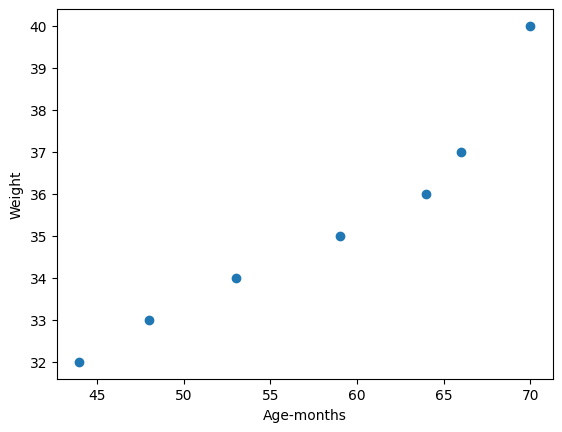

In [3]:
# use scatter graph to check the relationship between AgeM and Weight.
plt.scatter(df.AgeM,df.Weight)
plt.xlabel("Age-months")
plt.ylabel("Weight")
plt.show()

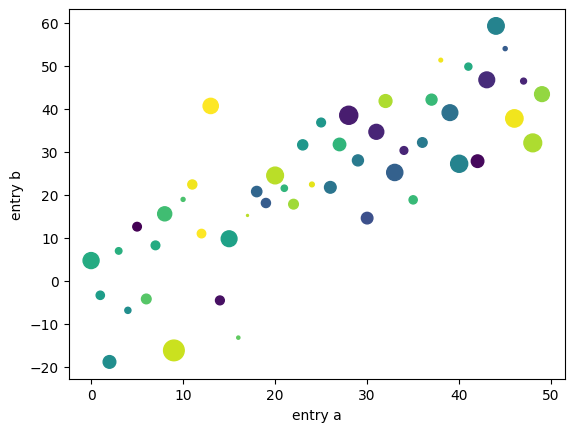

In [ ]:
# Source: https://matplotlib.org/stable/tutorials/pyplot.html
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Hat graph

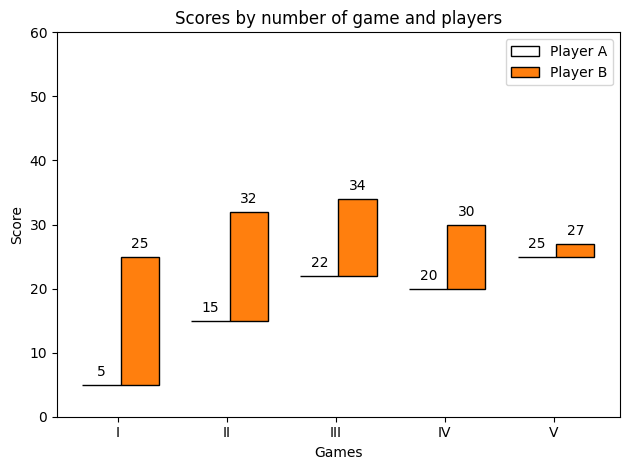

In [24]:
# Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/hat_graph.html#sphx-glr-gallery-lines-bars-and-markers-hat-graph-py
import matplotlib.pyplot as plt
import numpy as np


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()

# Stem plot
Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stem_plot.html#sphx-glr-gallery-lines-bars-and-markers-stem-plot-py

stem plots vertical lines from a baseline to the y-coordinate and places a marker at the tip.

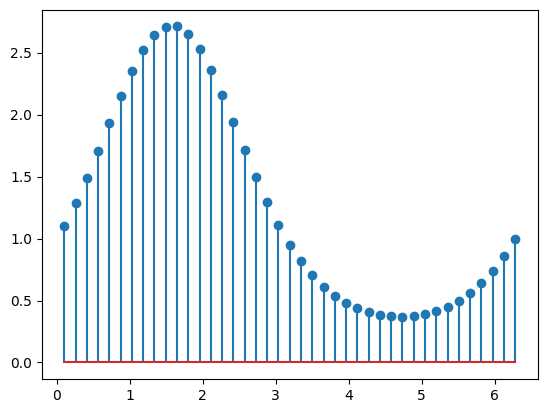

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.show()

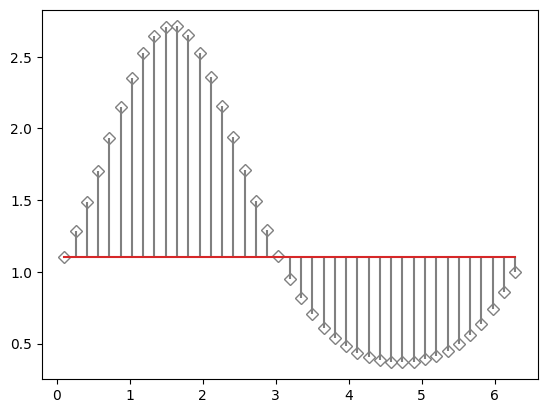

In [26]:
markerline, stemlines, baseline = plt.stem(
    x, y, linefmt='grey', markerfmt='D', bottom=1.1)
markerline.set_markerfacecolor('none')
plt.show()

# Scatter plot with masked values
Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py

Mask some data points and add a line demarking masked regions.

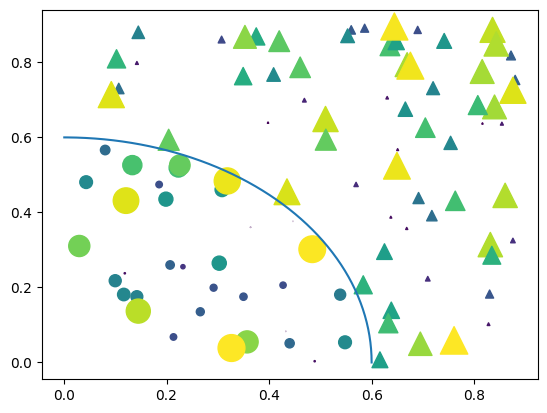

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

**Directly calculate the Pearson's correlations of variables**:

In [4]:
# calculate the pearson's correlation between two variables
df.Weight.corr(df.AgeM, method = 'pearson')
# df.AgeM.corr(df.Weight, method = 'pearson')

np.float64(0.9544913454946771)

In [5]:
# calculate the pairwise pearson's correlation of multiple columns
r = df.corr()
r

,Weight,AgeM,Baby Teeth,Eye Color
Weight,1.000000,0.954491,-0.990381,-0.151744
AgeM,0.954491,1.000000,-0.958188,-0.126163
Baby Teeth,-0.990381,-0.958188,1.000000,0.112160
Eye Color,-0.151744,-0.126163,0.112160,1.000000


**Use the heatmap to show the correlations**

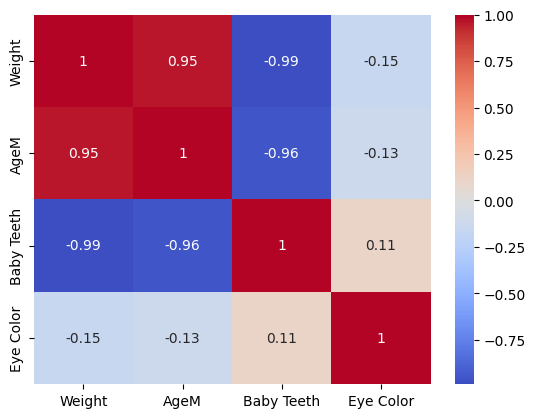

In [6]:
# use the heatmap to show the correlations
import seaborn as sns
# parameter "center" indicate the value at which to center the colormap when plotting divergant data.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(r, center= 0, cmap = "coolwarm",annot= True)
plt.show()

**Boxplots**<br> 
Can display the distribution of a variable based on the five-number summary: the minimum, the maximum, the sample **median**, and the first and third quartiles.<br>

In [7]:
box_df = pd.DataFrame({'score_a': [1,2,3,4,5,6,7,8,9]})
box_df

,score_a
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


**median (Q2/50th Percentile)**: the middle-point of the ordered data.<br> 
**first quartile (Q1/25th Percentile)**: the middle-point from the minimum to the median. 25% data fall below this value.<br> 
**third quartile (Q3/75th Percentile)**: the middle-point from the median to the maximum. 75% data fall below this value.<br> 
**interquartile range (IQR)**: Q3 - Q1.<br> 
**maximum** and **minimum** <br> 
The data point larger than Q3+1.5IQR, or smaller than Q1-1.5IQR will be considered as the outlier.<br>
**boxplot can also identify the outliners of a dataset.**

<Axes: >

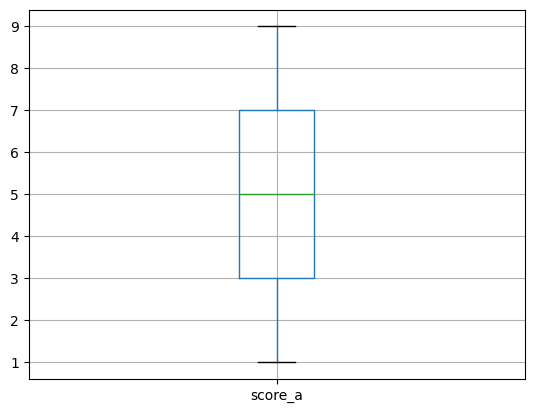

In [8]:
# box_df.boxplot()
box_df.boxplot(column= ["score_a"])

In [9]:
# go back the previous example.
df.head()

,Weight,AgeM,Baby Teeth,Eye Color
0,33,48,19,1
1,36,64,12,3
2,34,53,18,2
3,40,70,5,2
4,32,44,20,3


<Axes: >

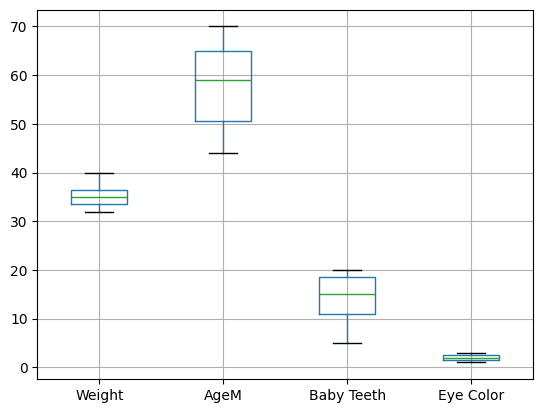

In [10]:
df.boxplot()

**Is boxplot good for purely categoricial data?**

**Violin plot**<br> 
Very similar to the boxplot, but it can also estimate the probability distribution of the variable. When you have more samples, Violin can show more information than the box plot. 

<Axes: xlabel='Weight'>

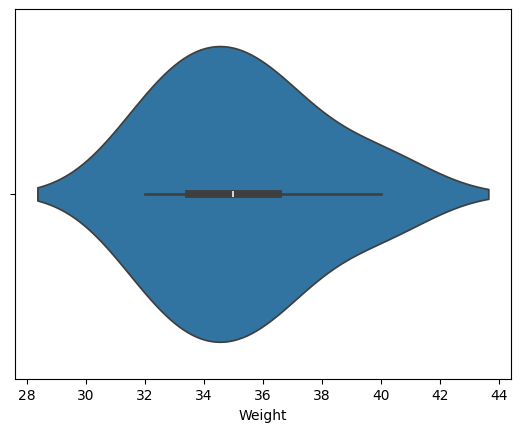

In [11]:
sns.violinplot(x = df["Weight"])

**waterfall chart**<br> 
show how a starting value of something (say, a beginning monthly balance in a checking account) becomes a final value (such as the balance in the account at the end of the month) through a series of intermediate additions and subtractions.
(refer from https://msktc.org/lib/docs/KT_Toolkit/Charts_and_Graphs/Charts_Waterfall_Charts_508c.pdf)

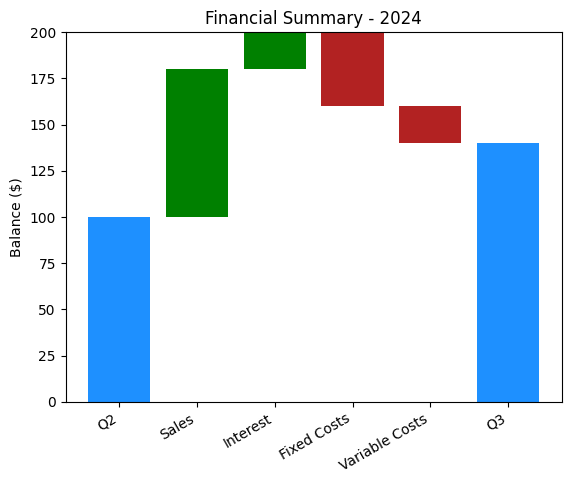

In [12]:
# source: https://www.pythoncharts.com/python/waterfall-charts/
from matplotlib import pyplot as plt
import numpy as np

# Labels for each bar.
categories = ['Q2', 'Sales', 'Interest', 'Fixed Costs', 'Variable Costs', 'Q3']

# Relative values. Note, the last bar for "Q3" is auto-calculated, so not given.
values = [100, 80, 20, -40, -20]

# Calculate the cumulative sum.
cumulative_values = np.cumsum(values)

# Create the waterfall chart
fig, ax = plt.subplots()

# Plot the bars
for i in range(len(values)):
    if i == 0:
        color = 'dodgerblue'
    elif values[i] >= 0:
        color = 'green'
    else:
        color = 'firebrick'
    ax.bar(
        categories[i],
        values[i],
        bottom=cumulative_values[i] - values[i],
        color=color
    )
# Plot the last bar.
ax.bar(categories[-1], cumulative_values[-1], color='dodgerblue')

# Add labels and title
ax.set_title('Financial Summary - 2024')
ax.set_ylabel('Balance ($)')

# Set x-axis labels to the middle of the bars
plt.xticks(rotation=30, ha='right')
plt.show()

**Chi-Square Test**<br> 
We can use this test to check if two variables are independent or not.

In [14]:
# The example is taken from the cs105 class. We want to check if the ?? and ?? is independent or not.
data = pd.DataFrame({'male':[250,50], 'female': [200,1000]},index=["fiction","non_fiction"])
data

,male,female
fiction,250,200
non_fiction,50,1000


In [15]:
# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(data)
print("calculated chi square value: " ,chi)
# print("degree of freedom: ", dfree)


calculated chi square value:  504.76686507936506


In [16]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
from scipy.stats import chi2
print("for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(1-0.001, 1)

for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:


np.float64(10.827566170662733)

**More functions about the data cleaning**

In [17]:
scores = pd.DataFrame({'score1':['good','fair','bad','fair'],'score2':['bad','good','bad','fair'],'score3':['bad','fair','good','fair']})
scores

,score1,score2,score3
0,good,bad,bad
1,fair,good,fair
2,bad,bad,good
3,fair,fair,fair


**Directly replace labels with numeric values**

In [18]:
scores = scores.replace({"score1":{'good': 2, 'fair': 1, 'bad':0}})
display(scores)
# scores.dtypes

# we don't use column.str.replace here!!
# scores["score1"].str.replace("good","0")


C:\Users\kudos\AppData\Local\Temp\ipykernel_23560\1164234440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scores = scores.replace({"score1":{'good': 2, 'fair': 1, 'bad':0}})


,score1,score2,score3
0,2,bad,bad
1,1,good,fair
2,0,bad,good
3,1,fair,fair


**Use bitwise orperators to select rows**<br>
'&': Returns 1 if both the bits are 1 else 0;<br>
'|': Returns 1 if either of the bit is 1 else 0;<br>
'~':Returns one’s complement of the number.<br>

In [19]:
# If neither score2 nor score3 returns a bad score for that student, 
# the student pass the exams, we return true for that student.

scores["pass"] = scores['score2'].isin(["good","fair"]) & scores['score3'].isin(["good","fair"])
# display(~(scores['score2'].isin(["bad"])))
scores

,score1,score2,score3,pass
0,2,bad,bad,False
1,1,good,fair,True
2,0,bad,good,False
3,1,fair,fair,True


In [20]:
# If score2 or score3 dosen't returns a bad score, the student pass the exams, we return true for that student.
scores["pass2"] = scores['score2'].isin(["good","fair"]) | scores['score3'].isin(["good","fair"])
scores

,score1,score2,score3,pass,pass2
0,2,bad,bad,False,False
1,1,good,fair,True,True
2,0,bad,good,False,True
3,1,fair,fair,True,True
